In [35]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd

In [36]:
device = device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [37]:
age = keras.Sequential([
                          keras.layers.Conv2D(96, 7, strides=4, padding='valid', activation='relu', input_shape=(227, 227, 3)),
                          keras.layers.MaxPooling2D(3, 2, padding='valid'),
                          keras.layers.BatchNormalization(axis=1, epsilon=0.001, momentum=0.9997),
                          keras.layers.Conv2D(256, 5, strides=1, padding='same', activation='relu'),
                          keras.layers.MaxPooling2D(3, 2, padding='valid'),
                          keras.layers.BatchNormalization(axis=1, epsilon=0.001, momentum=0.9997),
                          keras.layers.Conv2D(384, 3, strides=1, padding='valid', activation='relu'),
                          keras.layers.MaxPooling2D(3, 2, padding='valid'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(512, activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(512, activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(9, activation='softmax')
])
age.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy', 'mae', tf.keras.metrics.CategoricalAccuracy()])

In [38]:
from PIL import Image

In [39]:
def preprocess(path):
  image = Image.open(path)
  image = image.resize((227, 227))
  return np.array(image)

In [40]:
!git clone https://github.com/circulosmeos/gdown.pl.git

fatal: destination path 'gdown.pl' already exists and is not an empty directory.


In [41]:
!./gdown.pl/gdown.pl https://drive.google.com/file/d/0BxYys69jI14kb2o4ajJwQ3FOUm8/edit part1.tar.gz

Cannot open cookies file ‘gdown.cookie.temp’: No such file or directory
--2020-07-09 14:44:51--  https://docs.google.com/uc?id=0BxYys69jI14kb2o4ajJwQ3FOUm8&export=download
Resolving docs.google.com (docs.google.com)... 74.125.133.100, 74.125.133.113, 74.125.133.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.133.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘part1.tar.gz’

     0K                                     31.1M=0s

2020-07-09 14:44:52 (31.1 MB/s) - ‘part1.tar.gz’ saved [3233]

--2020-07-09 14:44:52--  https://docs.google.com/uc?export=download&confirm=5Bs1&id=0BxYys69jI14kb2o4ajJwQ3FOUm8
Resolving docs.google.com (docs.google.com)... 64.233.184.100, 64.233.184.102, 64.233.184.138, ...
Connecting to docs.google.com (docs.google.com)|64.233.184.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-74-docs.googleusercontent.com/docs/securesc

In [42]:
!./gdown.pl/gdown.pl https://drive.google.com/file/d/0BxYys69jI14kNEt1SnNJN1Z2WWc/edit part2.tar.gz

Cannot open cookies file ‘gdown.cookie.temp’: No such file or directory
--2020-07-09 14:45:02--  https://docs.google.com/uc?id=0BxYys69jI14kNEt1SnNJN1Z2WWc&export=download
Resolving docs.google.com (docs.google.com)... 74.125.133.101, 74.125.133.139, 74.125.133.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.133.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘part2.tar.gz’

     0K                                     8.02M=0s

2020-07-09 14:45:02 (8.02 MB/s) - ‘part2.tar.gz’ saved [3233]

--2020-07-09 14:45:02--  https://docs.google.com/uc?export=download&confirm=MYiW&id=0BxYys69jI14kNEt1SnNJN1Z2WWc
Resolving docs.google.com (docs.google.com)... 64.233.184.100, 64.233.184.102, 64.233.184.138, ...
Connecting to docs.google.com (docs.google.com)|64.233.184.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-80-docs.googleusercontent.com/docs/securesc

In [43]:
!./gdown.pl/gdown.pl https://drive.google.com/file/d/0BxYys69jI14kVkVTZHZHa21zUXM/edit part3.tar.gz

Cannot open cookies file ‘gdown.cookie.temp’: No such file or directory
--2020-07-09 14:45:09--  https://docs.google.com/uc?id=0BxYys69jI14kVkVTZHZHa21zUXM&export=download
Resolving docs.google.com (docs.google.com)... 74.125.133.101, 74.125.133.139, 74.125.133.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.133.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘part3.tar.gz’

     0K                                     32.8M=0s

2020-07-09 14:45:09 (32.8 MB/s) - ‘part3.tar.gz’ saved [3232]

--2020-07-09 14:45:09--  https://docs.google.com/uc?export=download&confirm=sXTM&id=0BxYys69jI14kVkVTZHZHa21zUXM
Resolving docs.google.com (docs.google.com)... 64.233.167.113, 64.233.167.138, 64.233.167.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.167.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-7o-docs.googleusercontent.com/docs/securesc

In [44]:
import tarfile
my_tar = tarfile.open('part1.tar.gz')
my_tar.extractall('./part1') # specify which folder to extract to
my_tar.close()

In [45]:
my_tar = tarfile.open('part2.tar.gz')
my_tar.extractall('./part2') # specify which folder to extract to
my_tar.close()

In [46]:
my_tar = tarfile.open('part3.tar.gz')
my_tar.extractall('./part3') # specify which folder to extract to
my_tar.close()

In [47]:
!ls part1/part1

10_0_0_20161220222308131.jpg   3_1_4_20170103210847515.jpg
10_0_0_20170103200329407.jpg   3_1_4_20170103212108940.jpg
10_0_0_20170103200522151.jpg   3_1_4_20170103212708915.jpg
10_0_0_20170103233459275.jpg   3_1_4_20170103213251308.jpg
10_0_0_20170104013211746.jpg   3_1_4_20170103234200795.jpg
10_0_0_20170110215927291.jpg   3_1_4_20170104005006111.jpg
10_0_0_20170110220033115.jpg   32_0_0_20170103182544874.jpg
10_0_0_20170110220111082.jpg   32_0_0_20170104165226793.jpg
10_0_0_20170110220235233.jpg   32_0_0_20170104170147266.jpg
10_0_0_20170110220251986.jpg   32_0_0_20170104172409163.jpg
10_0_0_20170110220255346.jpg   32_0_0_20170104173023034.jpg
10_0_0_20170110220316298.jpg   32_0_0_20170104200805226.jpg
10_0_0_20170110220403810.jpg   32_0_0_20170104200937337.jpg
10_0_0_20170110220447314.jpg   32_0_0_20170104201035977.jpg
10_0_0_20170110220503946.jpg   32_0_0_20170104202207601.jpg
10_0_0_20170110220514186.jpg   32_0_0_20170104202215275.jpg
10_0_0_20170110220530650.jpg   32_0_0_20170104

In [48]:
!./gdown.pl/gdown.pl https://drive.google.com/file/d/1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH/edit train.csv

Cannot open cookies file ‘gdown.cookie.temp’: No such file or directory
--2020-07-09 14:47:05--  https://docs.google.com/uc?id=1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH&export=download
Resolving docs.google.com (docs.google.com)... 74.125.133.100, 74.125.133.113, 74.125.133.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.133.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ksulmhp6n514gma43j67fm2m7gohcu6a/1594305975000/03161587497725415728/*/1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH?e=download [following]
--2020-07-09 14:47:05--  https://doc-04-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ksulmhp6n514gma43j67fm2m7gohcu6a/1594305975000/03161587497725415728/*/1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH?e=download
Resolving doc-04-64-docs.googleusercontent.com (doc-04-64-docs.googleusercontent.com)... 66.102.1.132, 2a00:1450:400c:c

In [49]:
!./gdown.pl/gdown.pl https://drive.google.com/file/d/1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86/edit dataset.zip

Cannot open cookies file ‘gdown.cookie.temp’: No such file or directory
--2020-07-09 14:47:13--  https://docs.google.com/uc?id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86&export=download
Resolving docs.google.com (docs.google.com)... 74.125.133.101, 74.125.133.139, 74.125.133.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.133.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dataset.zip’

     0K                                     37.4M=0s

2020-07-09 14:47:13 (37.4 MB/s) - ‘dataset.zip’ saved [3271]

--2020-07-09 14:47:13--  https://docs.google.com/uc?export=download&confirm=lrcf&id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86
Resolving docs.google.com (docs.google.com)... 74.125.133.100, 74.125.133.139, 74.125.133.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.133.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-5c-docs.googleusercontent.com/docs/

In [50]:
!unzip dataset.zip

Archive:  dataset.zip
replace train/1346.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


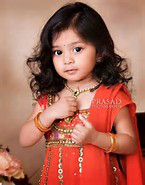

In [51]:
Image.open('part1/part1/3_1_3_20161219230521112.jpg')

In [52]:
!./gdown.pl/gdown.pl https://drive.google.com/file/d/1wOdja-ezstMEp81tX1a-EYkFebev4h7D/edit val.csv

Cannot open cookies file ‘gdown.cookie.temp’: No such file or directory
--2020-07-09 14:48:55--  https://docs.google.com/uc?id=1wOdja-ezstMEp81tX1a-EYkFebev4h7D&export=download
Resolving docs.google.com (docs.google.com)... 64.233.167.113, 64.233.167.138, 64.233.167.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.167.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bivnuglkh0sd42g3l0gggkbcniuimlgg/1594306125000/03161587497725415728/*/1wOdja-ezstMEp81tX1a-EYkFebev4h7D?e=download [following]
--2020-07-09 14:48:56--  https://doc-08-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bivnuglkh0sd42g3l0gggkbcniuimlgg/1594306125000/03161587497725415728/*/1wOdja-ezstMEp81tX1a-EYkFebev4h7D?e=download
Resolving doc-08-64-docs.googleusercontent.com (doc-08-64-docs.googleusercontent.com)... 66.102.1.132, 2a00:1450:400c:c

In [53]:
path = 'part1/part1/'
input = []
output = []
for filename in os.listdir(path):
  if filename.endswith(".jpg"): 
    if (filename.split('_')[2] == '3'):
      actual_age = int(filename.split('_')[0])
      if(actual_age>=0 and actual_age <=2):
        output.append(0)
      elif (actual_age>=3 and actual_age <= 9):
        output.append(1)
      elif (actual_age>9 and actual_age<=19):
        output.append(2)
      elif (actual_age>19 and actual_age<=29):
        output.append(3)
      elif (actual_age>29 and actual_age<=39):
        output.append(4)
      elif (actual_age>39 and actual_age<=49):
        output.append(5)
      elif (actual_age>49 and actual_age<=59):
        output.append(6)
      elif (actual_age>59 and actual_age<=69):
        output.append(7)
      else:
        output.append(8)
      input.append(preprocess(path+filename))
    continue
  else:
    continue

In [54]:
path = 'part2/part2/'
for filename in os.listdir(path):
  if filename.endswith(".jpg"): 
    if (filename.split('_')[2] == '3'):
      actual_age = int(filename.split('_')[0])
      if(actual_age>=0 and actual_age <=2):
        output.append(0)
      elif (actual_age>=3 and actual_age <= 9):
        output.append(1)
      elif (actual_age>9 and actual_age<=19):
        output.append(2)
      elif (actual_age>19 and actual_age<=29):
        output.append(3)
      elif (actual_age>29 and actual_age<=39):
        output.append(4)
      elif (actual_age>39 and actual_age<=49):
        output.append(5)
      elif (actual_age>49 and actual_age<=59):
        output.append(6)
      elif (actual_age>59 and actual_age<=69):
        output.append(7)
      else:
        output.append(8)
      input.append(preprocess(path+filename))
    continue
  else:
    continue

In [55]:
path = 'part3/part3/'
for filename in os.listdir(path):
  if filename.endswith(".jpg"): 
    if (filename.split('_')[2] == '3'):
      actual_age = int(filename.split('_')[0])
      if (actual_age>=0 and actual_age <=2):
        output.append(0)
      elif (actual_age>=3 and actual_age <= 9):
        output.append(1)
      elif (actual_age>9 and actual_age<=19):
        output.append(2)
      elif (actual_age>19 and actual_age<=29):
        output.append(3)
      elif (actual_age>29 and actual_age<=39):
        output.append(4)
      elif (actual_age>39 and actual_age<=49):
        output.append(5)
      elif (actual_age>49 and actual_age<=59):
        output.append(6)
      elif (actual_age>59 and actual_age<=69):
        output.append(7)
      else:
        output.append(8)
      input.append(preprocess(path+filename))
    continue
  else:
    continue

In [56]:
dataset_train = pd.read_csv('train.csv')
dataset_train.head()

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


In [57]:
for ind in dataset_train.index: 
  if(dataset_train['race'][ind] != 'Indian'):
    continue
  path = dataset_train['file'][ind]
  actual_age = dataset_train['age'][ind]
  if (actual_age == '0-2'):
    actual_age = 0
  elif (actual_age == '3-9'):
    actual_age = 1
  elif (actual_age == '10-19'):
    actual_age = 2
  elif (actual_age == '20-29'):
    actual_age = 3    
  elif (actual_age == '30-39'):
    actual_age = 4    
  elif (actual_age == '40-49'):
    actual_age = 5    
  elif (actual_age == '50-59'):
    actual_age = 6
  elif (actual_age == '60-69'):
    actual_age = 7
  elif (actual_age == 'more than 70'):
    actual_age = 8
  input.append(preprocess(path))
  output.append(actual_age)

In [58]:
print(len(input), len(output))
input = np.asarray(input)
output = np.asarray(output)
b = np.zeros((output.size, output.max()+1))
b[np.arange(output.size),output] = 1
output = b

16346 16346


In [59]:
age.fit(input, output, batch_size=256, epochs=100, validation_split =0.20, shuffle=True)

Epoch 1/100
52/52 [==============================] - 14s 264ms/step - loss: 2.0408 - accuracy: 0.2514 - mae: 0.1858 - categorical_accuracy: 0.2514 - val_loss: 6.9529 - val_accuracy: 0.2520 - val_mae: 0.1664 - val_categorical_accuracy: 0.2520
Epoch 2/100
52/52 [==============================] - 13s 259ms/step - loss: 1.9656 - accuracy: 0.2756 - mae: 0.1842 - categorical_accuracy: 0.2756 - val_loss: 4.3254 - val_accuracy: 0.2520 - val_mae: 0.1675 - val_categorical_accuracy: 0.2520
Epoch 3/100
52/52 [==============================] - 14s 261ms/step - loss: 1.9386 - accuracy: 0.2755 - mae: 0.1833 - categorical_accuracy: 0.2755 - val_loss: 4.9105 - val_accuracy: 0.2520 - val_mae: 0.1667 - val_categorical_accuracy: 0.2520
Epoch 4/100
52/52 [==============================] - 14s 262ms/step - loss: 1.9263 - accuracy: 0.2848 - mae: 0.1823 - categorical_accuracy: 0.2848 - val_loss: 2.8862 - val_accuracy: 0.2520 - val_mae: 0.1701 - val_categorical_accuracy: 0.2520
Epoch 5/100
52/52 [=============

In [60]:
age_classes = ['0-2', '3-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', 'more than 70']

In [61]:
def age_predict(path):
  l = []
  l.append(preprocess(path))
  l = np.asarray(l)
  prediction = age.predict(l)[0]
  return np.argmax(prediction)

In [62]:
age_predict('part1/part1/3_1_3_20161219230521112.jpg')

1

In [63]:
validation = pd.read_csv('val.csv')
validation.head()

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


In [64]:
validation['race'].value_counts()

White              2085
Latino_Hispanic    1623
Black              1556
East Asian         1550
Indian             1516
Southeast Asian    1415
Middle Eastern     1209
Name: race, dtype: int64

In [65]:
rows, cols = (9, 9) 
age_vs_age = [[0 for i in range(cols)] for j in range(rows)] 
for ind in validation.index: 
  if(validation['race'][ind] != 'Indian'):
    continue
  print(ind)
  path = validation['file'][ind]
  actual_age = validation['age'][ind]
  if (actual_age == '0-2'):
    actual_age = 0
  elif (actual_age == '3-9'):
    actual_age = 1
  elif (actual_age == '10-19'):
    actual_age = 2
  elif (actual_age == '20-29'):
    actual_age = 3    
  elif (actual_age == '30-39'):
    actual_age = 4    
  elif (actual_age == '40-49'):
    actual_age = 5    
  elif (actual_age == '50-59'):
    actual_age = 6
  elif (actual_age == '60-69'):
    actual_age = 7
  elif (actual_age == 'more than 70'):
    actual_age = 8
  predicted_age = age_predict(path)
  age_vs_age[actual_age][predicted_age]+=1

    

12
13
30
31
39
41
69
73
75
90
92
96
103
108
109
110
111
116
117
123
135
181
184
186
188
194
203
210
219
239
244
246
257
258
264
269
273
277
294
299
300
317
320
326
327
334
348
351
361
369
374
395
405
409
410
412
423
434
436
441
443
449
450
452
463
472
484
487
514
548
555
564
568
576
579
582
600
608
648
664
680
683
694
702
703
714
730
765
768
769
776
813
814
815
824
826
838
845
849
851
853
858
871
882
897
898
899
903
904
907
908
917
939
962
977
978
979
996
1002
1006
1014
1022
1026
1032
1041
1047
1053
1066
1073
1074
1076
1081
1085
1086
1091
1093
1094
1100
1108
1123
1130
1132
1145
1157
1175
1180
1183
1186
1194
1212
1224
1233
1239
1243
1250
1257
1269
1276
1291
1298
1304
1313
1339
1351
1358
1359
1370
1378
1380
1383
1384
1391
1395
1404
1407
1408
1409
1415
1417
1418
1428
1436
1441
1448
1458
1495
1499
1528
1554
1556
1570
1582
1590
1593
1608
1611
1615
1622
1630
1632
1634
1636
1663
1669
1671
1677
1693
1701
1704
1708
1711
1712
1734
1742
1750
1756
1774
1781
1782
1793
1798
1801
1803
1840
1842
1843


In [66]:
for row in age_vs_age:
  print(row)

[16, 1, 1, 0, 0, 0, 0, 0, 0]
[29, 102, 17, 19, 8, 1, 7, 0, 0]
[11, 44, 41, 65, 10, 9, 6, 0, 0]
[8, 17, 24, 197, 68, 53, 15, 1, 0]
[5, 9, 9, 121, 72, 94, 37, 1, 0]
[4, 4, 2, 39, 26, 73, 51, 0, 0]
[6, 1, 0, 14, 10, 33, 65, 1, 0]
[0, 0, 0, 3, 4, 8, 28, 1, 0]
[1, 0, 0, 2, 0, 2, 16, 2, 2]


In [67]:
!pip install h5py

In [68]:
# serialize model to JSON
model_json = age.to_json()
with open("age.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
age.save_weights("age.h5")
print("Saved model to disk")

Saved model to disk
